In [13]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from random import randint
plt.style.use('ggplot')

# pandas option set for more columns
# pd.set_option('max_columns', 200)

In [14]:
# Loading in the data 
X_train = np.load(r'data_folder/X_train.npy')
Y_train = np.load(r'data_folder/Y_train.npy')

In [15]:
# Lets define what the shape of both of the data frames looks like
print(X_train.shape)
print(Y_train.shape)

(151166, 28, 28)
(151166, 26)


In [16]:
# We now know, that we have more than 151k records of (28 , 28) images ( EMNIST dataset )
# whats more, we now that for every record X we have a record Y, which is a
# a one-hot encoded value, which index ( from 0 to 25 ) is the equivalence of letters from A to Z

# lets see how one record looks like, just because we can
a_random_value = randint(10, 900)
x = X_train[a_random_value]

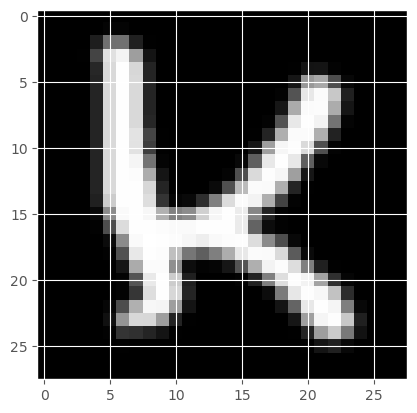

In [17]:
# and maybe visualize this one, would be quite handy, wouldnt it?
plt.imshow(x, cmap='gray')
plt.show()

In [18]:
Y_train[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0], dtype=uint8)

In [19]:
# here is an example to access one of the one-hot encoded values
chr(np.argmax(Y_train[a_random_value]) + 65)

'K'

In [20]:
# Also, lets see the dtypes of both X_train and Y_train
print(f"The dtype of the Images ( X ): {X_train.dtype}")
print(f"The dtype of the Answers ( Y ): {Y_train.dtype}")

The dtype of the Images ( X ): uint8
The dtype of the Answers ( Y ): uint8


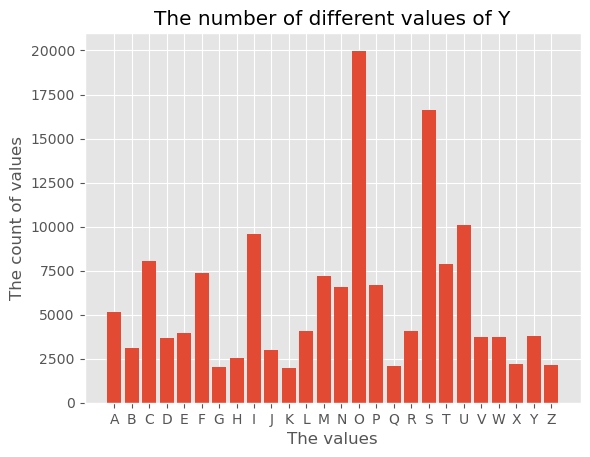

In [21]:
# --------------------------------------------------------------
# 
# In the next step, we should see how IMBALANCED THE DATA IS
# To visualize this, we will need a bar chart

# First, we need a dictionary of counted values
counted_Y = np.count_nonzero(Y_train, axis=0)
chr_of_Y_train = [chr(i) for i in range(65, 91)]

# then, we visualize it using py_lab
plt.bar(chr_of_Y_train, counted_Y)
plt.title("The number of different values of Y")
plt.xlabel("The values")
plt.ylabel("The count of values")
plt.show()

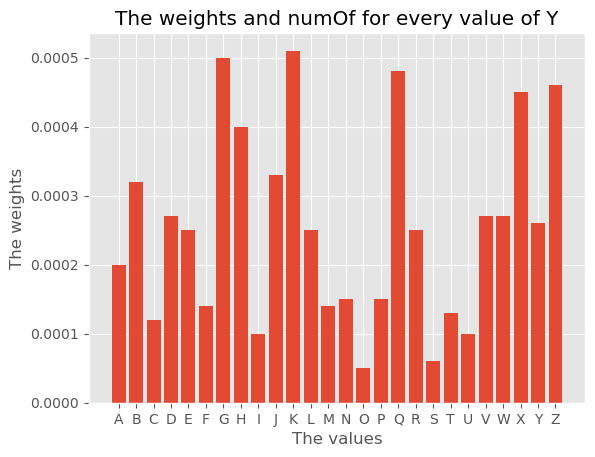

In [23]:
# I M P O R T A N T ! ! !
# To tackle this problem, we can use a data sampler,
# which, after calculating the weitghts, will apply it to a DataLoader
# resulting in the better performance of our Model


# helpful functions:
# The code could be better, but when writing it, I was drunk and exhausted, 
# so it is quite a pile of dogshit lmao


def one_hot_2_value(target_array):
    """

    this function translates the one-hot encoded targets into a numpy array of values of this target
    we use the np.nonzero() method to extract the index with the "one" in it,
    then we transpose it to fit the data

    :param target_array: a numpy array of one-hot encoded values ( an array of 0's and a 1)
    :type target_array: nd array
    :return: target_array: a transposed numpy array of values
    :rtype target_array: nd array
    """
    return np.transpose(np.nonzero(target_array)[1])


def calculation_of_weights(label_array) -> list:
    
    """

    This function calculates the wights of the target numpy array ( used in training the model )

    :param: label_array
    :type: ndarray
    :return: target_weights
    :rtype: list
    """
    from collections import Counter

    target_weights = []
    # Counting how many targets appear in the target set
    the_counter = Counter(one_hot_2_value(label_array))
    for _, occurrence_count in sorted(the_counter.items()):
        # when they are no values of an occurance, we should add a neutral weight to it
        if occurrence_count < 0:
            target_weights.append(0.5)
        else:
            # we calculate the weight as the inverse of its occurances
            target_weights.append(round(1. / occurrence_count, 5))
    return target_weights


Y_train_weights = calculation_of_weights(Y_train)

# Now lets visualize THE WEIGHTS
plt.bar(chr_of_Y_train, Y_train_weights)
plt.title("The weights and numOf for every value of Y")
plt.xlabel("The values")
plt.ylabel("The weights")
plt.show()


In [24]:
# We can see in the chart above, that the values
# WITH THE HIGHEST NUMBER OF OCCURANCES
# HAVE THE LOWEST WEIGHT

# AND VICE VERSA with the lowest values

# """

# PREPROCESSING OF THE DATA AND DATA AUGMANTATION
# IS DONE INSIDE THE PROJECT ITSELF, SO TAKE A LOOK RIGHT THERE LMAO

# """

'\nPREPROCESSING OF THE DATA AND DATA AUGMANTATION\nIS DONE INSIDE THE PROJECT ITSELF, SO TAKE A LOOK RIGHT THERE LMAO\n\n\n\n\n'